# Scenario
* You are tasked with investigating customer churn
    * churn: when a customer quits a service.  High churn rate = bad for business.
* in the `data/` folder is a the dataset you will be working on. 


# Complete the following
* Find features that are high indicators of churn and build visualizations
* Build a model to predict churn. You can build any model you want including
    * Logistic Regression 
    * KNN
    * Bayesian Classifiers
* Choose an evaluation metric for your model
    * Accuracy vs Precision vs Recall vs F1
* Explain why you chose that Metric
* Apply a GridsearchCV to find the best hyper parameters for your model
* After you build your final model you must have
    * A confusion matrix supporting your model
    * Final Metric Score
* Make sure you have a validation set for your data


# Can you
* Work in groups? Yes
* Ask cohort-mates for help/advice? Yes
* Check what you did with a cohort-mate? Yes
* Ask me for advice? Yes

This is an opportunity to practice some ML before the Phase 3 project. 


## things to remember
* A data scientist is good at finding key insights to problems not just building models
* validate your model with a confusion matrix and have a validation set

# The ASK
* Build a model to predict churn. So are we looking to predict if a user will enter or exit the service given some info, and then we will have to calculate churn based upon our model. 
* Components of CHURN:
    - Time periods
    - total customers acquired during time period
    - total customers lost

In [80]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix

import plotly
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('data/Churn_Modelling.csv')

df.columns = df.columns.str.lower()

df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

## Data Info
* Three string datatypes:
    - surname
    - geography
    - gender
* Target = Exited, 
    - 0 = has not unsubscribed
    - 1 = has unsubscribed
We should try to predict if a member is exited or not, and then calculate churn from that in post modeling work. 
   

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null int64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
for i in range(len(df)):
    if df.gender[i] == 'Female':
        df.gender[i] = 0
    elif df.gender[i] == 'Male':
        df.gender[i] = 1

df['gender'] = df.gender.astype('float64')


C:\Users\rmcar\Anaconda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rmcar\Anaconda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
age_range_list = []
for i in range(len(df)):
    if df.age[i] < 20:
        age_range_list.append('< 20')
        continue
    elif df.age[i] < 30:
        age_range_list.append('20-30')
        continue
    elif df.age[i] < 40:
        age_range_list.append('30-40')
        continue
    elif df.age[i] < 50:
        age_range_list.append('40-50')
        continue
    elif df.age[i] < 65:
        age_range_list.append('50-65')
        continue
    else:
        age_range_list.append('65+')
        
df['age_range'] = age_range_list

In [57]:
# categorical columns
df_ohe = df.copy()
catt = [ 'age_range',
        'geography'
]
encoded = OneHotEncoder(df_ohe[catt])
print(encoded)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=     age_range geography
0        40-50    France
1        40-50     Spain
2        40-50    France
3        30-40    France
4        40-50     Spain
...        ...       ...
9995     30-40    France
9996     30-40    France
9997     30-40    France
9998     40-50   Germany
9999     20-30    France

[10000 rows x 2 columns],
              sparse=True)


In [58]:
drops = [ 'rownumber',
         'customerid',
         'surname',
         'geography',
         'age',
         'age_range',
         'exited'
    
]
X = df.drop(columns = drops, axis = 0)
y = df.exited


In [59]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

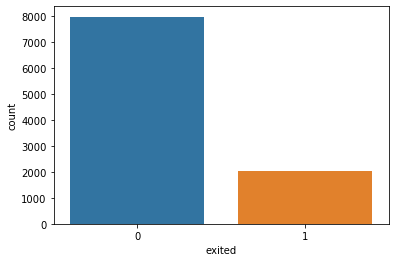

In [60]:
sns.countplot(x = 'exited', data = df)
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(logreg.score(X_test, y_test))

0.796


C:\Users\rmcar\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [65]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
442,0.395279,0.605108,0.604721,0.000387,0.211575


In [72]:
thresh = 0.39
preds = np.where(logreg.predict_proba(X_test)[:,1] > thresh, 1, 0)
print('Accuracy: {:.2f}'.format(logreg.score(X_test, preds)))

Accuracy: 0.95


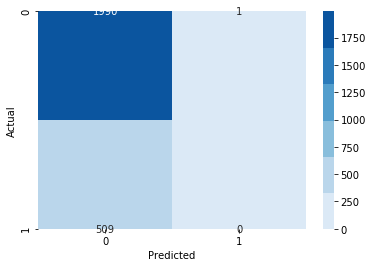

In [82]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='0.5g', cmap=sns.color_palette('Blues'))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()